---
numbering: false
---

# LW1: Least-Squares Problems

{button}`Launch in Colab <https://githubtocolab.com/jflamant/mines-nancy-optimization/blob/main/labs/LW1.ipynb>`
{button}`Download .ipynb file <https://github.com/jflamant/mines-nancy-optimization/blob/main/labs/LW1.ipynb>`

In this notebook, we will explore some **least-squares problems**, one of the first fundamental optimization problems encountered in this course. We'll focus on two classical problems:
- Polynomial regression
- Denoising a signal using least-squares and *regularizers* or *penalization* methods.

This first TP involves the practical implementation of least-squares problems using two classical Python libraries:
1. **NumPy**: For efficient numerical computations, matrix operations, and solving least-squares problems using built-in linear algebra functions.
2. **Matplotlib**: For visualizing the data and displaying / interpreting results.

### Running the Notebook
This notebook can be executed in the following environments:
- **Google Colab**: A convenient, cloud-based option that requires no setup. Simply open the notebook in Colab, and you're ready to run the code.
- **Locally**: You can run the notebook on your local machine using environments like **JupyterLab** or **Jupyter Notebook**. You can also run it directly in **Visual Studio Code** if you have the Jupyter extension. In all cases, ensure you have Python installed along with the required libraries, `NumPy` and `Matplotlib`.

In [1]:
# load necessary dependencies
import numpy as np
import matplotlib.pyplot as plt

###  1. Polynomial regression

This first exercise will permit to review basic instructions in Python as well as standard functions from NumPy and Matplotlib. The goal is to estimate the parameters of a polynomial model given experimental (i.e. noisy) data using the least-squares method.
We'll first define the *true* model, generate some noisy synthetic data, and then estimate the model parameters.

Consider the *ground truth* polynomial model $y_{\text{true}}(t) = 10t^3 + 3t^2 + 2t + 1$ for $t\in \mathbb{R}$.

**Questions**

1. Represent the function $y_{\text{true}}(t)$ on $[-1, 1]$.
2. Given $N =10$ equispaced time instants $t_1, \ldots, t_N$ over $[-1, 1]$, generate a noisy vector of measurements $\mathbf{y} \in \mathbb{R}^N$ with entries $y_n = y(t_n) = y_{\text{true}}(t) + \epsilon$, where $\epsilon \sim \mathcal{N}(0, 1)$ is Gaussian. Represent noisy measurements and the ground truth model on the same graph.
3. From the data $\mathbf{y}$, we wish to fit a polynomial model of order $d < 10$ of the form
$$y_{\text{model}}(t) = x_0 + x_1 t + x_2 t^2 + \ldots + x_{d+1}t^d$$
Write the linear model matrix $\mathbf{A}$ for an arbitrary order $d$. Construct this matrix numerically, given $d$ and the vector of time instants $\mathbf{t} = [t_1, t_2, \ldots, t_N]$. (Hint: check the ``np.vander`` function).

4. Given an integer $d <10$, write and solve the associated least squares problem. Display the estimated vector of coefficients. Compare the solution obtained by the explicit expression and that obtained with the ``np.linalg.pinv`` function.
5. Represent the estimated polynomial model for several values of $d$ (say $d=1, 3, 7$). Comment. What happens for $d=9$?
6. (Bonus) The choice of the degree of the polynomial can be evaluated using a standard criterion such as Akaike Information Criterion, defined as $\text{AIC} = 2p + 2\log r^2$, where $p$ is the number of parameters to be estimated and $r$ is the norm of the residual (in this context). Plot this criterion for the different choices of $d$. For each value of $d$ is the minimum attained?
7. (Bonus bis) Play around with differents values of $N$, true polynomial $y_{\text{true}}(t)$, or noise level $\sigma$!

In [2]:
# question 1
def ground_truth(t):
    """Calcule la valeur du polynôme théorique."""
    return 10*t**3 + 3*t**2 + 2*t + 1



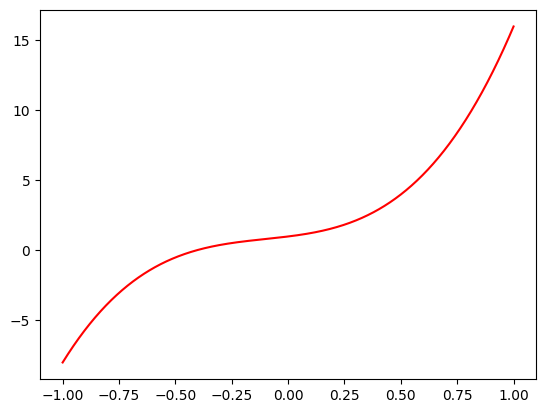

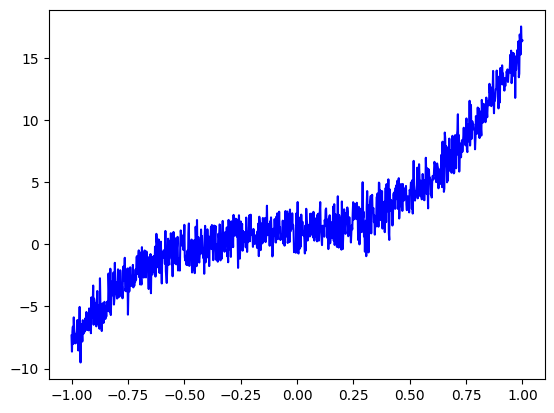

In [7]:

# 2. Génération des données bruitées
def generate_data(N, sigma=1.0):
    """Génère N points équidistants avec un bruit gaussien."""
    t = np.linspace(-1, 1, N)
    y_true = ground_truth(t)
    noise = np.random.normal(0, sigma, N)
    y_noisy = y_true + noise
    return t, y_true, y_noisy

temps=np.linspace(-1, 1, 1000)
plt.plot(temps,generate_data(1000)[1],color="r")
plt.show()
plt.plot(temps,generate_data(1000)[2],color="b")
plt.show()


In [8]:
# question 3

# 3. Construction de la matrice de modèle (Vandermonde)
def build_matrix_A(t, d):
    """
    Construit la matrice A pour un polynôme de degré d.
    A_ij = t_i^j , attention , ce qu'on passe entrée c'est d, donc le degré du polynome qu'on veut pour appoximer notre résultat ,
    note que si d=nb.points ,alors c une interpoloation
    """
    # np.vander génère [t^d, t^(d-1), ..., 1].
    # increasing=True donne [1, t, t^2, ..., t^d]
    A = np.vander(t, d + 1, increasing=True)
    return A

In [9]:
#
# 4. Résolution du problème de Moindres Carrés
def solve_least_squares(A, y, method='explicit'):
    """
    Résout Ax = y.
    Méthodes : 'explicit' (Formule normale) ou 'pinv' (Pseudo-inverse).
    """
    if method == 'explicit':
        # Formule : x = (A^T A)^-1 A^T y
        x_est = np.linalg.inv(A.T @ A) @ A.T @ y
    else:
        # Utilisation de la pseudo-inverse de Moore-Penrose
        x_est = np.linalg.pinv(A) @ y
    return x_est

In [ ]:
# question 5:

In [ ]:
# question 6: Bonus
# 5. Évaluation du critère AIC (Bonus)
def compute_aic(y, y_pred, p):
    """Calcule le critère d'Akaike."""
    residual_norm = np.linalg.norm(y - y_pred)
    # Formule : 2*p + 2*log(r^2)
    aic = 2*p + 2 * np.log(residual_norm**2)
    return aic

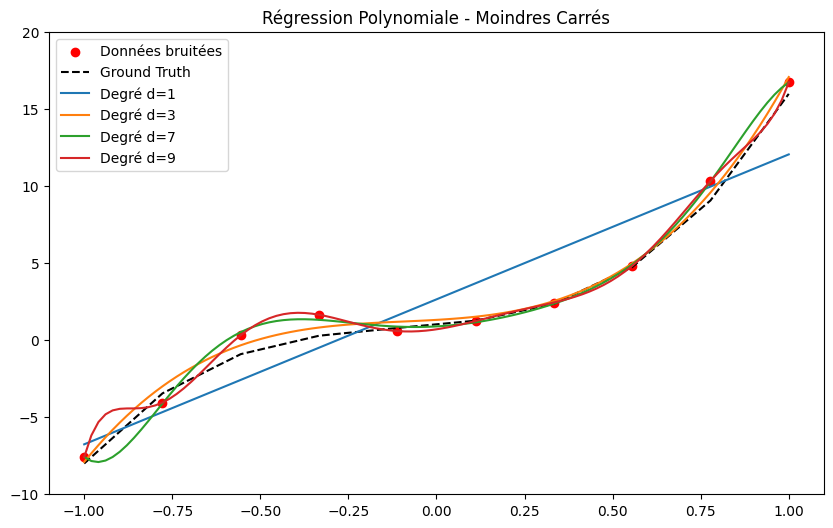

In [10]:
# Partie pour faire les tracés:
# --- Initialisation ---
N = 10
t, y_true, y_noisy = generate_data(N)

# --- Comparaison pour différents degrés d ---
degrees = [1, 3, 7, 9]
plt.figure(figsize=(10, 6))
plt.scatter(t, y_noisy, color='red', label='Données bruitées')
plt.plot(t, y_true, 'k--', label='Ground Truth')

for d in degrees:
    # Construction de A
    A = build_matrix_A(t, d)

    # Estimation des coefficients x
    x_hat = solve_least_squares(A, y_noisy, method='pinv')

    # Prédiction sur un axe plus fin pour un joli tracé
    t_plot = np.linspace(-1, 1, 100)
    A_plot = build_matrix_A(t_plot, d)
    y_model = A_plot @ x_hat

    plt.plot(t_plot, y_model, label=f'Degré d={d}')

plt.ylim(-10, 20)
plt.legend()
plt.title("Régression Polynomiale - Moindres Carrés")
plt.show()



### 2. Denoising

This second problem is the *denoising* problem which corresponds to the reconstruction of a signal $x(t)$ from noisy measurements $y(t) = x(t) + n(t)$, where $n(t)$ is some noise.
A typical assumption is that noise is Gaussian, i.e., for a given time instant $t_i$,  $n(t_i) \sim \mathcal{N}(0, \sigma^2)$ where $\sigma^2$ is the noise variance.

The denoising problem can be formulated as a least squares problem. Let $t_1, \ldots, t_N$ be $N$ time instants and denote by $\mathbf{x}, \mathbf{y}$ the vectors encoding the signal and the measurements, respectively. The denoising problem seeks to solve

$$\min_{\mathbf{x}\in\mathbb{R}^N} \Vert \mathbf{y}-\mathbf{x}\Vert^2_2$$

**Preliminary questions**
1. What is the solution to the least squares problem $\hat{\mathbf{x}}$?

Usually, we have access to extra information about the signal $\mathbf{x}$: e.g. it is non-negative, it belongs to some class of constraints, it exhibits regularity in some representation domain, etc.
A classical assumption is that the signal is smooth. At first order, this is encoded by the function
$$ r(\mathbf{x}) = \sum_{n=1}^{N-1} (x_{n+1}- x_{n})^2$$

2. Show that $r(\mathbf{x}) $ can be expressed as $r(\mathbf{x}) = \Vert \mathbf{D}_1\mathbf{x}\Vert^2_2$

To take into account the smoothness of the solution into the denoising problem, we formulate a new problem, called *regularized least squares* or *penalized least squares*. It reads
$$\min_{\mathbf{x}\in \mathbb{R}^N} \Vert \mathbf{y} - \mathbf{x}\Vert^2_2 + \lambda r(\mathbf{x}), \quad \lambda \geq 0$$
where
- $\Vert \mathbf{y}-\mathbf{x}\Vert$ is called the data fidelity term;
- $r(\mathbf{x})$ is the regularization (or penalty) and $\lambda\geq 0$ is called the regularization parameter.

3. Compute the solution to the regularized least squares problem above with $r(\mathbf{x}) = \Vert \mathbf{D}_1\mathbf{x}\Vert^2_2$. Comment on the uniqueness of the solution. What happens when $\lambda \rightarrow 0$? When $\lambda \rightarrow \infty$?

> Write here your answers to preliminary questions using Markdown

**Implementation tasks**

1. Generate a smooth signal $x(t) = \cos(2\pi f_0 t)$ where $f_0 = 5$ Hz and $t \in [0, 1]$ s. Choose a sampling frequency that satisfies the Shannon-Nyquist criterion.
2. Generate noisy measurements by corrupting the signal vector $\mathbf{x}$ by additive white Gaussian noise with SNR = 10 dB. (Recall the formula for the SNR!)
3. Solve the regularized least squares for different values of $\lambda$, and represent corresponding solutions. Compare it to the ground truth signal.  
4. A common question in penalized optimization problems is to choose the hyperparameter $\lambda$. A classical approach is to use a heuristic called L-curve: for various values of $\lambda$, plot the data fidelity term vs the penalty term in the cost function. From this tool, what would be a good choice of $\lambda$ according to you? Why?
5. Start again the exercise with the second-order penalty function
$$ r(\mathbf{x}) = \sum_{n=2}^{N-1} (x_{n+1}- 2x_{n} + x_{n-1})^2$$
Compare your results with the first-order difference penalty.

In [11]:
# question 1.
# 1. Génération du signal selon Shannon-Nyquist
def generate_noisy_sinusoid(f0=5, duration=1, snr_db=10):
    fs = 10 * f0  # Fréquence d'échantillonnage (bien au delà de 2*f0)
    t = np.arange(0, duration, 1/fs)
    x_true = np.cos(2 * np.pi * f0 * t)

    # Calcul du bruit en fonction du SNR
    # SNR = 10 * log10( P_signal / P_noise )
    p_signal = np.mean(x_true**2)
    p_noise = p_signal / (10**(snr_db / 10))
    sigma = np.sqrt(p_noise)

    y = x_true + np.random.normal(0, sigma, len(t))
    return t, x_true, y

In [12]:
# Question 2:
# 2. Construction des matrices de différence
def build_diff_matrix(N, order=1):
    """Construit D1 (ordre 1) ou D2 (ordre 2)."""
    if order == 1:
        # Différences premières: x[n+1] - x[n]
        D = np.diag(-1 * np.ones(N), 0) + np.diag(np.ones(N-1), 1)
        return D[:-1, :]
    elif order == 2:
        # Différences secondes: x[n+1] - 2x[n] + x[n-1]
        D = np.diag(np.ones(N-1), -1) + np.diag(-2 * np.ones(N), 0) + np.diag(np.ones(N-1), 1)
        return D[1:-1, :]

In [13]:
# question 3:
# 3. Solveur de Moindres Carrés Régularisés
def solve_denoising(y, lam, order=1):
    N = len(y)
    I = np.eye(N)
    D = build_diff_matrix(N, order=order)

    # Résolution de (I + lambda * D.T @ D) x = y
    A = I + lam * (D.T @ D)
    return np.linalg.solve(A, y)

In [14]:
# question 4
# 4. Calcul de la L-curve
def get_l_curve_data(y, lambdas, order=1):
    fidelity = []
    penalty = []
    for lam in lambdas:
        x_hat = solve_denoising(y, lam, order)
        D = build_diff_matrix(len(y), order)

        fidelity.append(np.linalg.norm(y - x_hat)**2)
        penalty.append(np.linalg.norm(D @ x_hat)**2)

    return fidelity, penalty

<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-784512360.py:11: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(t, x_denoised, label=f"$\lambda$={lam}")


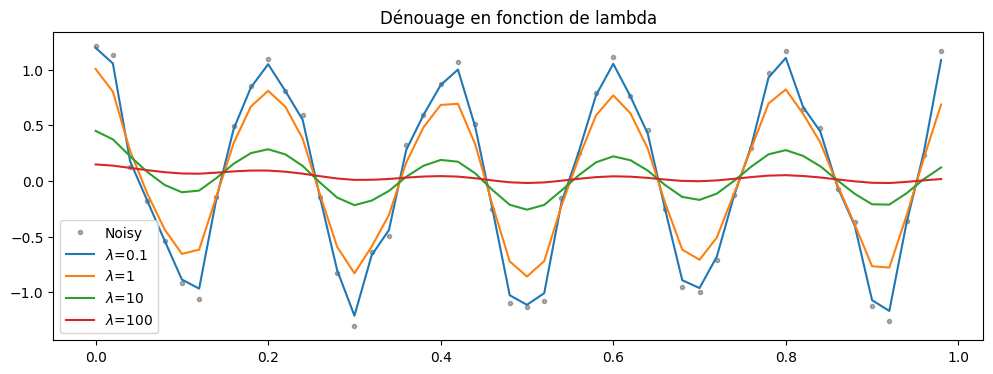

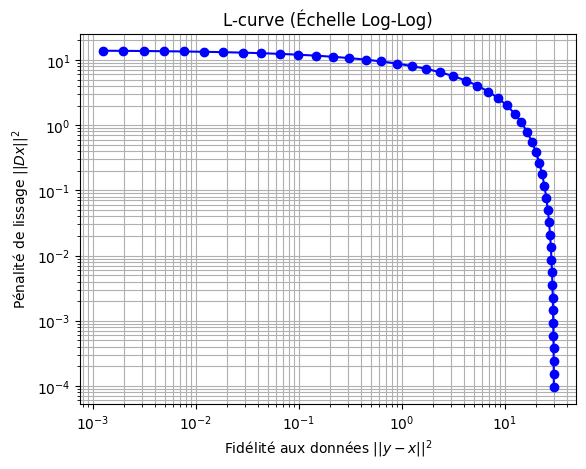

In [15]:
# question 5
# Configuration
t, x_true, y_noisy = generate_noisy_sinusoid()
lambdas = [0.1, 1, 10, 100]

# Comparaison des lambda
plt.figure(figsize=(12, 4))
plt.plot(t, y_noisy, 'k.', alpha=0.3, label="Noisy")
for lam in lambdas:
    x_denoised = solve_denoising(y_noisy, lam, order=1)
    plt.plot(t, x_denoised, label=f"$\lambda$={lam}")

plt.legend()
plt.title("Dénouage en fonction de lambda")
plt.show()

# Affichage de la L-curve
l_lambdas = np.logspace(-2, 3, 50)
fid, pen = get_l_curve_data(y_noisy, l_lambdas)

plt.figure()
plt.loglog(fid, pen, 'b-o')
plt.xlabel("Fidélité aux données $||y-x||^2$")
plt.ylabel("Pénalité de lissage $||Dx||^2$")
plt.title("L-curve (Échelle Log-Log)")
plt.grid(True, which="both")
plt.show()